# Lab Assignment 2



### Hwayeon Kang, s2245661

## Presentation and coding style (3 marks)

In this assignment, some marks are allocated to your coding style and presentation. Try to make your code more readable using the tips given in your computer lab 2. Make sure your figures have good quality, right size, good range and proper labels.

## Task 1 (4 marks)

In this task we try to use several method from Lab 2 to solve the initial value problem 

\begin{equation}
y' = 4t-3y, \quad y(0)=1,
\end{equation}

Set the step size to $h = 0.05$ and numerically solve this ODE from $t=0$ to $0.5$ using the following methods:

- Forward Euler 

- Adams–Bashforth order 2

- Adams–Bashforth order 3 (we did not code this method in the computer lab, but you can find the formula on [this wikipedia page](https://en.wikipedia.org/wiki/Linear_multistep_method)). For this method, you need to build the very first two steps using other methods. For the first step, use the Euler scheme. For the second step, use Adams–Bashforth order 2. 


Plot the three different approximations, and display the values in a table.

In [1]:
# Import packages
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from inspect import signature

In [2]:
#  Define the function in the RHS of the ODE given in the question
def f(t, y):
    return 4 * t - 3 * y

# Euler method
def ode_Euler(func, times, y0):
    times = np.array(times)
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    nT = times.size   # the number of time steps 
    y = np.zeros([nT,n])
    y[0, :] = y0
    # loop for timesteps
    for k in range(nT-1):
        y[k+1, :] = y[k, :] + (times[k+1]-times[k]) * func(times[k], y[k, :])
    return y

# Adams-Bashforth 2 method
def ode_AB2(func, initialTime, finalTime, nSteps, y0):
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    dt = (finalTime - initialTime) / nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt * func(times[0], y[0, :])
    # Other steps using Adams-Bashforth 2
    for k in range(1, nSteps):
        y[k+1,:] = y[k,:] + dt * (1.5 * func(times[k], y[k,:]) - 0.5 * func(times[k-1], y[k-1,:]))
    return y, times

# Adams-Bashforth 3 method (using Euler and AB2 for initial steps)
def ode_AB3(func, initialTime, finalTime, nSteps, y0):
    y0 = np.array(y0)
    n = y0.size       # the dimension of ODE 
    dt = (finalTime - initialTime) / nSteps
    times = np.linspace(initialTime, finalTime, nSteps + 1)
    y = np.zeros([nSteps + 1, n])
    y[0,:] = y0
    # First step using Euler
    y[1,:] = y[0,:] + dt * func(times[0], y[0, :])
    # Second step using Adams-Bashforth 2
    y[2,:] = y[1,:] + dt * (1.5 * func(times[1], y[1,:]) - 0.5 * func(times[0], y[0,:]))
    # Adams-Bashforth 3 for the rest of the steps
    for k in range(2, nSteps):
        y[k+1,:] = y[k,:] + dt * (23 * func(times[k], y[k,:]) - 16 * func(times[k-1], y[k-1,:]) + 5 * func(times[k-2], y[k-2,:])) / 12
    return y, times

In [3]:
# Time setup and initial condition
h = 0.05
initialTime = 0
finalTime = 0.5
nSteps = int((finalTime - initialTime) / h)
t = np.linspace(initialTime, finalTime, nSteps + 1)
y0 = 1

# Solve using the three methods
y_euler = ode_Euler(f, t, y0)
y_ab2, t_ab2 = ode_AB2(f, initialTime, finalTime, nSteps, y0)
y_ab3, t_ab3 = ode_AB3(f, initialTime, finalTime, nSteps, y0)

       t     Euler  Adams-Bashforth 2  Adams-Bashforth 3
0   0.00  1.000000           1.000000           1.000000
1   0.05  0.850000           0.850000           0.850000
2   0.10  0.732500           0.748750           0.748750
3   0.15  0.642625           0.669031           0.665984
4   0.20  0.576231           0.609655           0.606139
5   0.25  0.529797           0.567660           0.563274
6   0.30  0.500327           0.540661           0.535936
7   0.35  0.485278           0.526587           0.521626
8   0.40  0.482486           0.523654           0.518641
9   0.45  0.490113           0.530326           0.525361
10  0.50  0.506596           0.545277           0.540446


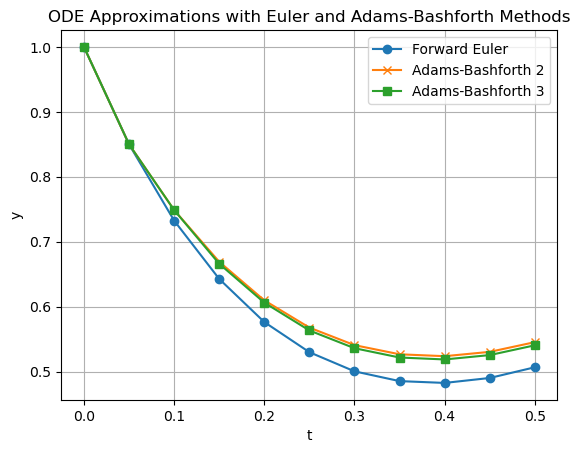

In [4]:
# Create and display a table for the results
results_df = pd.DataFrame({
    't': t,
    'Euler': y_euler.flatten(),
    'Adams-Bashforth 2': y_ab2.flatten(),
    'Adams-Bashforth 3': y_ab3.flatten()
})

print(results_df)

# Plot the results
plt.figure()
plt.plot(t, y_euler, label='Forward Euler', marker='o')
plt.plot(t_ab2, y_ab2, label='Adams-Bashforth 2', marker='x')
plt.plot(t_ab3, y_ab3, label='Adams-Bashforth 3', marker='s')
plt.xlabel('t')
plt.ylabel('y')
plt.title("ODE Approximations with Euler and Adams-Bashforth Methods")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Autograder tests
function_names = ["ode_Euler", "ode_AB2", "ode_AB3"]

print("Checking for the correct number of arguments:")
for function_name in function_names:
    function_signature = signature(eval(function_name))
    assert len(function_signature.parameters) == 5 if function_name != 'ode_Euler' else 3
    print(" ✔ " + function_name)

print("\nChecking for the correct outputs:")
expected_values = [0.506596, 0.545277, 0.540446]
for function_name, expected_value in zip(function_names, expected_values):
    if function_name == "ode_Euler":
        obtained_values = eval(function_name)(f, np.linspace(0, 0.5, 11), 1)
    else:
        obtained_values, _ = eval(function_name)(f, 0, 0.5, 10, 1)
    if (np.abs(float(obtained_values[-1]) - expected_value) < 10e-5):
        print(" ✔ " + function_name)
    else:
        print(" ✘ " + function_name)
        assert(np.abs(float(obtained_values[-1]) - expected_value) < 10e-5)

Checking for the correct number of arguments:
 ✔ ode_Euler
 ✔ ode_AB2
 ✔ ode_AB3

Checking for the correct outputs:
 ✔ ode_Euler
 ✔ ode_AB2
 ✔ ode_AB3


## Task 2 (3 marks)

Use `SymPy` to solve the differential equation $y' = 4t-3y$, with $y(0)=1$, present the analytical solution. What is the value $y(0.5)$? Also, find the value of $t=t_{m}$ where $y(t)$ achieves a minimum value. What is the value of $y_{m} = y(t_{m})$?

Compare the result with the approximations from the three methods in Task 1. You may use a table to show the results of each method at $y(0.5)$ and $y_{m}$. Which method is the most/least accurate? Why?

In [6]:
# Standard setup
import sympy as sm
sm.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot

In [7]:
# Define the variables and the differential equation
t = sm.symbols('t')
y = sm.Function('y')
eq = sm.Eq(y(t).diff(t), 4 * t - 3 * y(t))
print("The equation:")
display_latex(eq)

# Solve the equation with initial condition y(0) = 1
eq_sol = sm.dsolve(eq, y(t), ics={y(0): 1})
print("With initial condition y(0)=1:")
display_latex(sm.simplify(eq_sol))

# Evaluate the solution at t = 0.5
y_at_05 = eq_sol.rhs.subs(t, 0.5)
print(f"\ny(0.5) = {y_at_05}")

The equation:


With initial condition y(0)=1:



y(0.5) = 0.544521342436621


### We'll find the value of $t=t_m$ where $y(t)$ achieves a minimum value by the following steps:

i. **First Derivative:** We take the first derivative of $y(t)$ to find the critical points.

ii. **Solve for Critical Points:** We solve $y'(t)=0$ to find the critical points where the solution could have a minimum or maximum.

iii. **Second Derivative Test:** We take the second derivative of $y(t)$ to confirm if the critical points correspond to a minimum (where $y''(t)>0$).

iv. **Evaluate at Minimum:** Finally, we evaluate $y(t)$ at the critical points that correspond to a minimum.


> It seems that the minimum value contains an imaginary component because the symbolic solver is returning a complex number as one of the critical points. So, we'll focus on ***real*** values only by filtering out any complex numbers and restricting our search to real solutions.

In [8]:
# First derivative of the solution
y_prime = sm.diff(eq_sol.rhs, t)
print("\nThe first derivative (y'(t)):")
display_latex(y_prime)

# Solve for critical points where y'(t) = 0
critical_points = sm.solve(y_prime, t)

# Second derivative of the solution
y_double_prime = sm.diff(y_prime, t)
print("\nThe second derivative (y''(t)):")
display_latex(y_double_prime)

# Filter out complex critical points by checking if the result is real
real_critical_points = [crit_point for crit_point in critical_points if crit_point.is_real]

# Check which critical points correspond to a minimum using the second derivative test
min_critical_points = []
for crit_point in real_critical_points:
    if y_double_prime.subs(t, crit_point) > 0:
        min_critical_points.append(crit_point)

# If there are minimum points, evaluate y(t) at these points
if min_critical_points:
    t_min = min_critical_points[0]
    y_min = eq_sol.rhs.subs(t, t_min)
    print(f"\nMinimum value of y(t): {y_min.evalf()} at t = {t_min.evalf()}")
else:
    print("No minimum found in the real domain.")


The first derivative (y'(t)):



The second derivative (y''(t)):



Minimum value of y(t): 0.523846665040732 at t = 0.392884998780549


In [9]:
# Compare the result with the approximations from the three methods in Task 1

# Numerical solutions for y(0.5)
y_euler_at_05 = y_euler[-1].item()
y_ab2_at_05 = y_ab2[-1].item()
y_ab3_at_05 = y_ab3[-1].item()

# Analytical solution for y(0.5) and y_min
y_analytical_at_05 = y_at_05.evalf()
y_analytical_min = y_min.evalf()

# Add numerical approximations of y_min from the methods
# Since the numerical methods do not directly provide y_min, we approximate it by taking the minimum value of the arrays.
y_euler_min = float(min(y_euler.flatten()))
y_ab2_min = float(min(y_ab2.flatten()))
y_ab3_min = float(min(y_ab3.flatten()))

# Create a table for comparison
comparison_df = pd.DataFrame({
    'Method': ['Analytical', 'Euler', 'Adams-Bashforth 2', 'Adams-Bashforth 3'],
    'y(0.5)': [float(y_analytical_at_05), float(y_euler_at_05), float(y_ab2_at_05), float(y_ab3_at_05)],
    'y_min': [float(y_analytical_min), y_euler_min, y_ab2_min, y_ab3_min]
})

# Display the table
print("\nComparison of y(0.5) and y_min across methods:")
print(comparison_df)

# Calculate the absolute errors for y(0.5) and y_min
comparison_df['y(0.5) Error'] = [0] + list(abs(comparison_df['y(0.5)'][1:] - float(y_analytical_at_05)))
comparison_df['y_min Error'] = [0] + list(abs(comparison_df['y_min'][1:] - float(y_analytical_min)))

# Display the comparison with errors
print("\nComparison with Errors:")
print(comparison_df)
comparison_df_no_analytical = comparison_df.drop(index=0)

# Conclusion on accuracy
most_accurate_y05 = comparison_df_no_analytical.loc[comparison_df_no_analytical['y(0.5) Error'].idxmin(), 'Method']
least_accurate_y05 = comparison_df_no_analytical.loc[comparison_df_no_analytical['y(0.5) Error'].idxmax(), 'Method']
most_accurate_ymin = comparison_df_no_analytical.loc[comparison_df_no_analytical['y_min Error'].idxmin(), 'Method']
least_accurate_ymin = comparison_df_no_analytical.loc[comparison_df_no_analytical['y_min Error'].idxmax(), 'Method']

print(f"\nMost accurate for y(0.5): {most_accurate_y05}")
print(f"Least accurate for y(0.5): {least_accurate_y05}")
print(f"Most accurate for y_min: {most_accurate_ymin}")
print(f"Least accurate for y_min: {least_accurate_ymin}")


Comparison of y(0.5) and y_min across methods:
              Method    y(0.5)     y_min
0         Analytical  0.544521  0.523847
1              Euler  0.506596  0.482486
2  Adams-Bashforth 2  0.545277  0.523654
3  Adams-Bashforth 3  0.540446  0.518641

Comparison with Errors:
              Method    y(0.5)     y_min  y(0.5) Error  y_min Error
0         Analytical  0.544521  0.523847      0.000000     0.000000
1              Euler  0.506596  0.482486      0.037925     0.041360
2  Adams-Bashforth 2  0.545277  0.523654      0.000755     0.000192
3  Adams-Bashforth 3  0.540446  0.518641      0.004075     0.005206

Most accurate for y(0.5): Adams-Bashforth 2
Least accurate for y(0.5): Euler
Most accurate for y_min: Adams-Bashforth 2
Least accurate for y_min: Euler


**Adams-Bashforth 2 shows the most accurate result, while Euler's Method shows the least accurate.** This may be because Adams-Bashforth 2 strikes a better balance between accuracy and stability. Euler's method, being a first-order method, makes a relatively crude approximation of the solution at each step, which can easily lead to a larger cumulative error over the integration interval.

Adams-Bashforth 3, as a third-order method, theoretically should be more accurate than Adams-Bashforth 2. However, with the step size $h = 0.05$, it might not be small enough for Adams-Bashforth 3 to outperform Adams-Bashforth 2. Since Adams-Bashforth 3 uses data from three previous points in my code, it may result in overcorrection.

In conclusion, Adams-Bashforth 2 strikes the best balance due to its higher-order approximation without the potential overcorrections that Adams-Bashforth 3 might introduce at the chosen step size. Euler's Method, with its simpler approach, accumulates more error and is the least accurate.